In [2]:
import pandas as pd
from sqlalchemy import create_engine
import pymysql
import json
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

#from config import local_db_user, local_db_pwd, local_db_endpoint, local_db_port, local_db_name
from config import remote_db_endpoint, remote_db_port, remote_db_user, remote_db_pwd, remote_db_name

In [3]:
cloud_engine = create_engine(f"postgresql://{remote_db_user}:{remote_db_pwd}@{remote_db_endpoint}:{remote_db_port}/{remote_db_name}")

In [4]:
cloud_conn = cloud_engine.connect()

In [5]:
africa_data = pd.read_sql("select * from ultimate", cloud_conn)

In [6]:
africa_data.dtypes

country_name                            object
country_code                            object
year                                     int64
conflict_frequency_code                  int64
conflict_deaths_code                   float64
population_density                     float64
population_growth_annual_per           float64
total_population                       float64
refugee_pop_origin                      object
rural_population                       float64
rural_population_per                   float64
rural_population_growth                float64
urban_population                       float64
urban_population_per                   float64
urban_population_growth                float64
corruption_control_estimate            float64
corruption_control_percentile          float64
government _effectiveness_est          float64
government_effectiveness_percentile    float64
stability_est                          float64
stability_percentile                   float64
regulatory_es

In [7]:
africa_data.columns

Index(['country_name', 'country_code', 'year', 'conflict_frequency_code',
       'conflict_deaths_code', 'population_density',
       'population_growth_annual_per', 'total_population',
       'refugee_pop_origin', 'rural_population', 'rural_population_per',
       'rural_population_growth', 'urban_population', 'urban_population_per',
       'urban_population_growth', 'corruption_control_estimate',
       'corruption_control_percentile', 'government _effectiveness_est',
       'government_effectiveness_percentile', 'stability_est',
       'stability_percentile', 'regulatory_est', 'regulatory_percentile',
       'ruleoflaw_est', 'ruleoflaw_percentile', 'accountability_est',
       'accountability_percentile ', 'ethnic_score', 'gdp_growth_per',
       'gdp_percap_per', 'mortality_rate', 'gdp_total', 'gdp_percap',
       'gni_total', 'fdi_inflows_gdp', 'fdi_inflows_total',
       'conflict_fatalities', 'conflict_events'],
      dtype='object')

In [100]:
africa_econ=africa_data[['gdp_total', 'gni_total', 'rural_population_growth', 'ethnic_score', 'ruleoflaw_est', 'government _effectiveness_est', 'stability_est', 'total_population', 'mortality_rate', 'fdi_inflows_gdp', 'fdi_inflows_total', 'conflict_events']]
africa_econ.head()

,gdp_total,gni_total,rural_population_growth,ethnic_score,ruleoflaw_est,government _effectiveness_est,stability_est,total_population,mortality_rate,fdi_inflows_gdp,fdi_inflows_total,conflict_events
0,4.818775e+10,4.618775e+10,-0.33,0.354,-1.16,-0.83,-1.88,30192754.0,34.9,1.26,606600000,48.0
1,4.864061e+10,4.635061e+10,-0.53,0.356,-1.21,-0.96,-1.43,30623406.0,34.4,0.60,291600000,66.0
2,5.478873e+10,5.207873e+10,-0.62,0.357,-0.72,-0.57,-1.39,31042235.0,33.9,0.51,280100000,170.0
3,5.474584e+10,5.315042e+10,-0.69,0.358,-0.67,-0.58,-1.51,31451514.0,33.3,2.03,1113105541,250.0
4,5.676062e+10,5.456855e+10,-0.75,0.359,-0.63,-0.60,-1.63,31855109.0,32.4,1.88,1064960000,268.0


In [111]:
X=africa_econ[['gdp_total', 'gni_total', 'ethnic_score', 'rural_population_growth', 'ruleoflaw_est', 'government _effectiveness_est', 'stability_est', 'total_population', 'mortality_rate', 'fdi_inflows_gdp', 'fdi_inflows_total']]
y=africa_econ['conflict_events'].values.reshape(-1,1)
#print(X.shape, y.shape)
africa_econ

,gdp_total,gni_total,rural_population_growth,ethnic_score,ruleoflaw_est,government _effectiveness_est,stability_est,total_population,mortality_rate,fdi_inflows_gdp,fdi_inflows_total,conflict_events
0,4.818775e+10,4.618775e+10,-0.33,0.354,-1.16,-0.83,-1.88,30192754.0,34.9,1.26,606600000,48.00
1,4.864061e+10,4.635061e+10,-0.53,0.356,-1.21,-0.96,-1.43,30623406.0,34.4,0.60,291600000,66.00
2,5.478873e+10,5.207873e+10,-0.62,0.357,-0.72,-0.57,-1.39,31042235.0,33.9,0.51,280100000,170.00
3,5.474584e+10,5.315042e+10,-0.69,0.358,-0.67,-0.58,-1.51,31451514.0,33.3,2.03,1113105541,250.00
4,5.676062e+10,5.456855e+10,-0.75,0.359,-0.63,-0.60,-1.63,31855109.0,32.4,1.88,1064960000,268.00
...,...,...,...,...,...,...,...,...,...,...,...,...
1087,1.949552e+10,1.764328e+10,1.98,0.416,-1.43,-1.21,-0.71,13586681.0,40.4,2.43,472800000,2.38
1088,1.996312e+10,1.798077e+10,1.84,0.417,-1.32,-1.16,-0.62,13814629.0,38.5,2.00,399200000,1.78
1089,2.054868e+10,1.877295e+10,1.68,0.418,-1.37,-1.16,-0.62,14030390.0,36.3,1.67,343013813,0.76
1090,2.204090e+10,2.007960e+10,1.55,0.420,-1.38,-1.19,-0.71,14236745.0,35.4,1.12,247187739,4.70


In [112]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)
X

,gdp_total,gni_total,ethnic_score,rural_population_growth,ruleoflaw_est,government _effectiveness_est,stability_est,total_population,mortality_rate,fdi_inflows_gdp,fdi_inflows_total
0,4.818775e+10,4.618775e+10,0.354,-0.33,-1.16,-0.83,-1.88,30192754.0,34.9,1.26,606600000
1,4.864061e+10,4.635061e+10,0.356,-0.53,-1.21,-0.96,-1.43,30623406.0,34.4,0.60,291600000
2,5.478873e+10,5.207873e+10,0.357,-0.62,-0.72,-0.57,-1.39,31042235.0,33.9,0.51,280100000
3,5.474584e+10,5.315042e+10,0.358,-0.69,-0.67,-0.58,-1.51,31451514.0,33.3,2.03,1113105541
4,5.676062e+10,5.456855e+10,0.359,-0.75,-0.63,-0.60,-1.63,31855109.0,32.4,1.88,1064960000
...,...,...,...,...,...,...,...,...,...,...,...
1087,1.949552e+10,1.764328e+10,0.416,1.98,-1.43,-1.21,-0.71,13586681.0,40.4,2.43,472800000
1088,1.996312e+10,1.798077e+10,0.417,1.84,-1.32,-1.16,-0.62,13814629.0,38.5,2.00,399200000
1089,2.054868e+10,1.877295e+10,0.418,1.68,-1.37,-1.16,-0.62,14030390.0,36.3,1.67,343013813
1090,2.204090e+10,2.007960e+10,0.420,1.55,-1.38,-1.19,-0.71,14236745.0,35.4,1.12,247187739


In [103]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

X_train.head()

,gdp_total,gni_total,ethnic_score,rural_population_growth,ruleoflaw_est,government _effectiveness_est,stability_est,total_population,mortality_rate,fdi_inflows_gdp,fdi_inflows_total
447,3.666349e+09,3.395184e+09,0.733,1.54,-1.26,-0.87,-1.03,8925743.0,86.5,2.67,97900000
92,6.541604e+09,2.957675e+10,0.766,1.96,-0.43,-0.76,0.16,13829176.0,77.5,1.28,83849256
697,4.223684e+10,4.158535e+10,0.549,0.41,-0.02,-0.15,-0.26,29454768.0,38.5,1.14,480355698
277,8.785068e+10,8.851118e+10,0.025,1.80,0.01,-0.41,-0.41,71485043.0,33.6,0.74,646900000
761,3.387804e+09,3.361675e+09,0.667,3.69,-0.52,-0.67,0.04,12647984.0,86.8,0.55,18529139


In [104]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [105]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

print(X_train_scaled)

[[-0.40225889 -0.40849013  0.45867877 ...  1.01601032 -0.21624447
  -0.3881785 ]
 [-0.35840902  0.00306431  0.58893601 ...  0.68915193 -0.40083594
  -0.39734851]
 [ 0.18597096  0.19183054 -0.26760399 ... -0.72723441 -0.41942788
  -0.13857457]
 ...
 [-0.41690826 -0.4194337  -1.21492932 ... -0.38584899 -0.16976461
  -0.39872039]
 [-0.02075897 -0.01914889  1.05075711 ... -0.5747005  -0.06352491
   0.26321638]
 [-0.45173321 -0.45518288 -2.4346107  ... -1.23931255  0.1741864
  -0.43660511]]


In [106]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [107]:
X_train_scaled[0]

array([-0.40225889, -0.40849013,  0.45867877,  0.0660482 , -0.93240195,
       -0.27804252, -0.53939515, -0.3708541 ,  1.01601032, -0.21624447,
       -0.3881785 ])

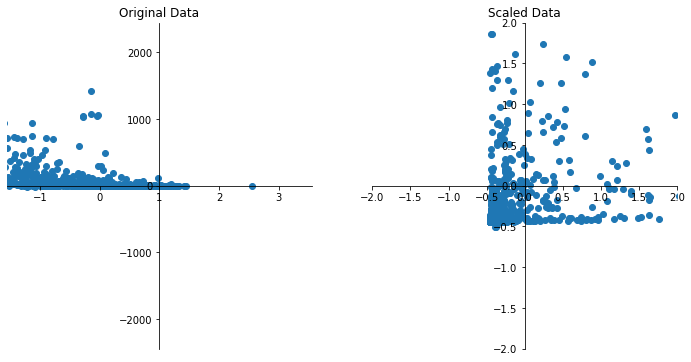

In [108]:
fig1 = plt.figure(figsize=(12, 6))
axes1 = fig1.add_subplot(1, 2, 1)
axes2 = fig1.add_subplot(1, 2, 2)

axes1.set_title("Original Data")
axes2.set_title("Scaled Data")

maxx = X_train['stability_est'].max()
maxy = y_train.max()
axes1.set_xlim(-maxx + 1, maxx + 1)
axes1.set_ylim(-maxy + 1, maxy + 1)

axes2.set_xlim(-2, 2)
axes2.set_ylim(-2, 2)

def set_axes(ax):
    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
set_axes(axes1)
set_axes(axes2)

axes1.scatter(X_train['stability_est'], y_train)
axes2.scatter(X_train_scaled[:,0], y_train_scaled[:])

In [109]:
from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.585435688379429, R2: 0.4900605902322315


In [110]:
summodel = sm.OLS(y, X)
results = summodel.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.540
Model:                            OLS   Adj. R-squared (uncentered):              0.535
Method:                 Least Squares   F-statistic:                              115.2
Date:                Wed, 02 Sep 2020   Prob (F-statistic):                   2.07e-173
Time:                        14:42:05   Log-Likelihood:                         -7365.9
No. Observations:                1092   AIC:                                  1.475e+04
Df Residuals:                    1081   BIC:                                  1.481e+04
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                                    coef    std err          t      P>|t|      [0.025      0.975]
----------------------

In [ ]:
# this version has the lowest p values. the r2 is comparable to other ones the included urban_population_growth, 
#the corruption_control_estimate, and #government_accountability. 